# Машинное обучение, DS-поток
## Задание ML.4


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание**

* Задача 1 &mdash; 30 баллов;
* Задача 2 &mdash; 70 баллов;
* Задача 3 &mdash; 30 баллов;
* Задача 4 &mdash; 60 баллов.

In [1]:
# Bot check

# HW_ID: ds_ml4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import Ridge


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3, palette='Set2')

---
### Задача 1

Пусть обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$ такова, что
* объекты $X_1, ..., X_n$ одномерны и имеют распределение $\mathcal{N}(0, \sigma^2)$;
* отклик получается по правилу $Y_i = X_i^2 + \varepsilon_i$, где $\varepsilon_i$ независимы, имеют нулевое среднее и не зависят от $X_i$. 

Пусть также для объекта $X$ отклик $Y$ получен по аналогичному правилу, причем $X$ и $Y$ не зависят от обучающей выборки.

Для МНК-модели $\widehat{y}(x) = \widehat{\theta} x$ выпишите подробное bias-variance разложение со всеми тремя компонентами: смещение, разброс, шум. Компоненту, отвечающую за разброс, разрешается не доводить до конца. Если в выражении присутствует дисперсия $\varepsilon_i$, то так и пишите: $\mathsf{D}\varepsilon_i$.

Положим
$$
y_i = X_i^2 + \epsilon_i = f(X_i) + \epsilon_i
$$

Тогда ($x$ - произвольный элемент множества признаков $X$, берем матожидание)
$$
MSE = \mathbb E [\hat y(x) - y(x)]^2 = \mathbb E [\hat y - f(x) + \epsilon]^2 = \mathbb E [\hat y - f(x)]^2 + \mathbb E \epsilon^2 + 2 \mathbb E[(\hat y - f(x)) \epsilon]
$$

в силу независимости ошибки раскрывая матожидание произведения получим ноль (матожидание ошибки нуль), тогда

$$
MSE = \mathbb E [\hat y - f(x)]^2 + \sigma_{\epsilon}^2
$$

Первое слагаемое раскрываем аналогично:
$$
\mathbb E[\hat y - f(x) - \mathbb E \hat y  + \mathbb E \hat y]^2 = \mathbb E [\hat y - \mathbb E \hat y]^2 + \mathbb E [f(x) - \mathbb E \hat y]^2 - 2 \mathbb E[(\hat y - \mathbb E \hat y)(f(x) - \mathbb E \hat y)]
$$

Так как второй множитель выносится как константа (матожидание по выборке, от него $f(x)$ не зависит), получим опять, что перекрестное слагаемое уходит, и одно из слагаемых облегчается:

$$
= [f(x) - \mathbb E \hat y]^2 + \mathbb E [\hat y - \mathbb E \hat y]^2
$$

Обозначим

$$
bias = [f(x) - \mathbb E \hat y]
$$

$$
variance = \mathbb E [\hat y - \mathbb E \hat y]^2
$$

Тогда:

$$
MSE = bias^2 + variance + \sigma_\epsilon^2
$$

Будем существенно пользоваться одномерностью (суммирование по повторяющимся индексам)

МНК модель:
$$
\theta = (X^T X)^{-1}X^T Y \Rightarrow \theta = \frac{1}{X_i X_i} X_j Y_j = \frac{1}{X_i X_i} X_j (X_j^2 + \epsilon_j)
$$
$$
\hat y = \theta x \Rightarrow \hat y = x \mathbb \theta = x \mathbb E \frac{X_j X_j^2 + X_j \epsilon_j}{X_i X_i}
$$
Из независимости (которая следует из свойств нормального распределения и $\epsilon_j$, а также $\mathbb E \epsilon_j$ получим, что второе слагаемое занулится. Обозначим за $S_i$ - сумму $i$-х степеней $X_k$. Тогда:

$$
\mathbb E \left[ \frac{S_3}{S_2} \right] = \mathbb E \left[\mathbb E \left[ \frac{S_3}{S_2} | S_2 \right]  \right]
$$

А уже при зафиксированном $S_2$ занулится числитель, потому что это нечетный момент, откуда

$$
\mathbb E\hat \theta = \mathbb E\hat y = 0
$$


Второй момент посчитать сложнее

$$
\mathbb E \hat y ^2 = x^2 \mathbb E \frac{(X_j X_j^2 + X_j \epsilon_j)^2}{(X_i X_i)^2}
$$

Сокращая $\epsilon$ аналогичными рассуждениями (оно исчезает из части $2ab$ суммы квадратов в силу независимости и того что матож равно нулю):

$$
\mathbb E \hat y ^2 = x^2 \mathbb E \frac{X_j X_j^5 + X_j^4 \epsilon_j^2}{X_i X_i^3} = x^2 \left[ \mathbb E \frac{X_j X_j^5}{X_i X_i^3} + \mathbb E \frac{X_j^4}{X_i X_i^3}\mathbb E \epsilon_j^2\right] = x^2 \left[ \mathbb E \frac{X_j X_j^5}{X_i X_i^3} + \mathbb E \frac{X_j^4}{X_i X_i^3}\mathbb D \epsilon_j\right]
$$

Итого:

$$
bias = [x^2 - 0] = x^2
$$

$$
variance = \mathbb D(\hat y) = x^2 \left[ \mathbb E \frac{X_j X_j^5}{X_i X_i^3} + \mathbb E \frac{X_j^4}{X_i X_i^3}\mathbb D \epsilon_j\right]
$$

Шум:
$$
noise = \mathbb D(\epsilon)
$$

---
### Задача 2

В этой задаче вам предлагается исследовать зависимость качества предсказаний модели случайного леса в зависимости от различных гиперпараметров на примере задаче регрессии. Будем использовать класс `RandomForestRegressor` библиотеки `sklearn`.

В качестве данных возьмём датасет `california_housing` из библиотеки `sklearn` о стоимости недвижимости в различных округах Калифорнии. Этот датасет состоит из 20640 записей и содержит следующие признаки для каждого округа: `MedInc`, `HouseAge`, `AveRooms`, `AveBedrms`, `Population`, `AveOccup`, `Latitude`, `Longitude`. `HouseAge` и `Population` &mdash; целочисленные признаки. Остальные признаки &mdash; вещественные.

*Совет.* При отладке кода используйте небольшую часть данных. Финальные вычисления проведите на полных данных. Для оценки времени работы используйте `tqdm` в циклах.

In [3]:
housing = fetch_california_housing()
X, y = housing.data, housing.target

Разбейте данные на train и test, выделив на test 25% данных.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#test_size=0.25)

Посмотрите, как изменяется качество леса в зависимости от выбранных параметров. Для этого постройте графики зависимости MSE на тестовой выборке от количества деревьев (от 1 до 100) и от максимальной глубины дерева (от 3 до 25). Когда варьируете один из параметров, в качестве другого берите значение по умолчанию.

Попробуйте получить зависимость от количества деревьев, обучив лишь **один случайный лес**. В этом вам поможет аттрибут `_estimators` у обученной модели. Последовательно вызывайте predict у каждого дерева и усредняйте полученные результаты.

Посчитаем зависимость от числа деревьев, далее от глубины (при 50 деревьях)

In [5]:
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

y_pred_sum_test = 0
y_pred_sum_train = 0
mse_trees_cnt_test = []
mse_trees_cnt_train = []

i = 0
for tree in forest.estimators_:
    y_pred_sum_train += tree.predict(X_train)
    y_pred_sum_test += tree.predict(X_test)
    y_pred_train = y_pred_sum_train / (i + 1)
    y_pred_test = y_pred_sum_test / (i + 1)
    mse_trees_cnt_test.append(mean_squared_error(y_test, y_pred_test))
    mse_trees_cnt_train.append(mean_squared_error(y_train, y_pred_train))
    i += 1

mse_depth_list_test = []
mse_depth_list_train = []

for depth in range(3, 26):
    forest = RandomForestRegressor(n_estimators=50,
                                   max_depth=depth,
                                   random_state=42)
    forest.fit(X_train, y_train)
    y_pred_test = forest.predict(X_test)
    y_pred_train = forest.predict(X_train)
    mse_depth_list_train.append(mean_squared_error(y_train, y_pred_train))
    mse_depth_list_test.append(mean_squared_error(y_test, y_pred_test))

Осталось построить графики

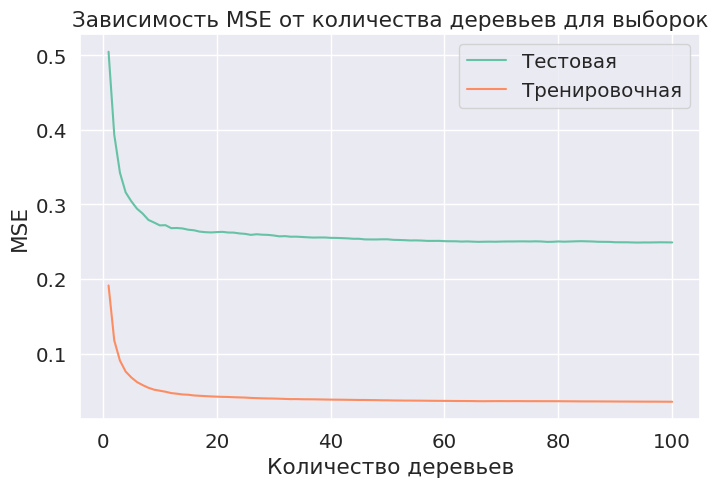

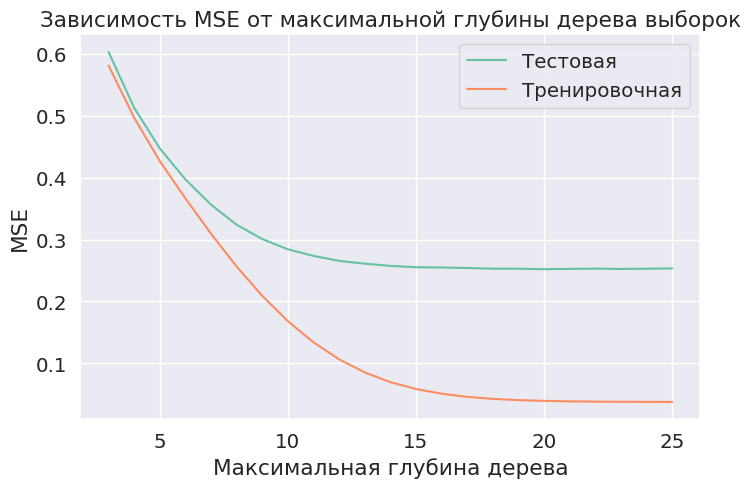

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 101), mse_trees_cnt_test, label='Тестовая')
plt.plot(range(1, 101), mse_trees_cnt_train, label='Тренировочная')
plt.xlabel('Количество деревьев')
plt.ylabel('MSE')
plt.title('Зависимость MSE от количества деревьев для выборок')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(range(3, 26), mse_depth_list_test, label='Тестовая')
plt.plot(range(3, 26), mse_depth_list_train, label='Тренировочная')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('MSE')
plt.title('Зависимость MSE от максимальной глубины дерева выборок')
plt.legend()
plt.show()

Основываясь на полученных графиках, ответьте на следующие вопросы.

1. Какие закономерности можно увидеть на построенных графиках? Почему графики получились такими?

2. Как изменяется качество предсказаний с увеличением исследуемых параметров, когда эти параметры уже достаточно большие.

3. В предыдущем задании вы на практике убедились, что решающее дерево начинает переобучаться при достаточно больших значениях максимальной глубины. Справедливо ли это утверждение для случайного леса? Поясните свой ответ, опираясь на своё знание статистики.

**Ответ:** 

1) С увеличением числа деревьев и глубины MSE уменьшается, но начиная с некоторого момента улучшения почти незначительны. Это логично, потому что с ростом параметров растет и предсказательные возможности модели

2) Что интересно, так это то, что MSE убывает равномерно от количества деревьев в выборке. Это говорит о том, что случайный лес устойчив к переобучению за счет случайности внутри своей реализации

3) Однако если глубина достаточно большая (порядка 10-15), то начинается переобучение в некотором виде (улучшение на тестовой выборке не такое сильное, как на тренировочной) - уже каждое дерево из леса будет несколько переобучено

4) Устойчивость к переобучению основывается на случайности деревьев между собой в лесу, тогда при усреднении не будет общей скоррелированной ошибки. В случае если деревья скоррелированы, то ошибка будет расти. **Если каждое из деревьев в отедельности будет сильнее в своей предсказательной силе (больше глубина),** то хоть и ошибка каждого из них в отдельности будет меньше, но они будут более скоррелированы (потому что более полную информацию из датасета), и за счет этого лес выиграет не так много, как мог бы.

Обучите случайный лес с параметрами по умолчанию и выведите MSE на тестовой выборке. Проведите эксперимент 3 раза. Почему результаты отличаются? Какие источники случайности есть при построении случайного леса и какие из них реализуются в данном случае?

In [7]:
for i in range(3):
    forest = RandomForestRegressor()  
    forest.fit(X_train, y_train)      
    y_pred = forest.predict(X_test) 
    mse = mean_squared_error(y_test, y_pred) 
    print(f"Эксперимент {i+1}, MSE: {round(mse, 4)}")

Эксперимент 1, MSE: 0.2497
Эксперимент 2, MSE: 0.2515
Эксперимент 3, MSE: 0.25


**Ответ:** 

Результаты отличаются за счет случайности в моделях, они вызваны:

1) Случайными подвыборками (bagging)

2) Случайным выбором признаков в каждом узле каждого деерва

Было бы неплохо определиться с тем, какое количество деревьев нужно использовать и какой максимальной глубины они будут. Подберите оптимальные значения `max_depth` и `n_estimators` с помощью кросс-валидации.

Сама кросс валидация:

In [15]:
param_grid = {
    'max_depth': np.arange(12, 23), 
    'n_estimators': np.arange(22, 35)
}

forest_gridsearch = GridSearchCV(
    estimator=RandomForestRegressor(n_jobs=-1),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    n_jobs=-1 
)

forest_gridsearch.fit(X_train, y_train)

/home/juequ/.local/lib/python3.10/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]),
                         'n_estimators': array([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])},
             scoring='neg_mean_squared_error')

Выведите найденные оптимальные параметры.

In [16]:
forest_gridsearch.best_params_

{'max_depth': np.int64(17), 'n_estimators': np.int64(34)}

Зафиксируем эти оптимальные значения параметров и в дальнейшим будем их использовать.

In [17]:
max_depth = 17
n_estimators = 34

Оценим качество предсказаний обученного решающего леса.

In [18]:
forest = forest_gridsearch.best_estimator_

y_pred = forest.predict(X_test) 
print('MSE: ', round(mean_squared_error(y_test, y_pred), 3))

MSE:  0.256


Исследуйте зависимость метрики MSE от количества признаков, по которым происходит разбиение в вершине дерева. Поскольку количество признаков в датасете не очень большое (их 8), то можно перебрать все возможные варианты количества признаков, использующихся при разбиении вершин.

Не забывайте делать пояснения и выводы!

In [20]:
n_features = X_train.shape[1]

mse_train = []
mse_test = []

for max_features in range(1, n_features + 1):
    forest = RandomForestRegressor(max_depth=max_depth,
                                   n_estimators=n_estimators,
                                   max_features=max_features,
                                   random_state=42)
    forest.fit(X_train, y_train)
    
    y_train_pred = forest.predict(X_train)
    y_test_pred = forest.predict(X_test)
    
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))

Постройте график зависимости метрики MSE на `test` и `train` в зависимости от числа признаков, использующихся при разбиении в каждой вершине.

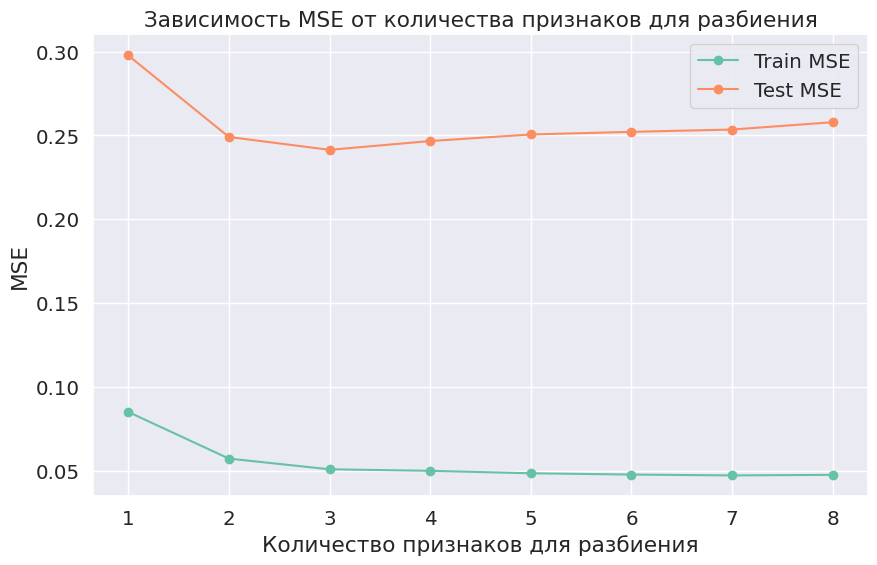

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_features + 1), mse_train, label='Train MSE', marker='o')
plt.plot(range(1, n_features + 1), mse_test, label='Test MSE', marker='o')
plt.xlabel('Количество признаков для разбиения')
plt.ylabel('MSE')
plt.title('Зависимость MSE от количества признаков для разбиения')
plt.legend()
plt.grid(True)
plt.show()

Почему график получился таким? Как зависит разнообразие деревьев, инными словами их скоррелированность, от величины `n_features`?

**Ответ:**

Сначала качество на тестовой модели растет, а потом остается постоянным, хотя качество на тренировочной модели несколько улучшается.

Дело в том, что начиная с 3 признаков модели становятся более скоррелированными, и модель начинает в большей степени переобучаться, поэтому улучшения не происходит

Проведите эксперимент, в котором выясните, как изменится качество регрессии, если набор признаков, по которым происходит разбиение в каждой вершине определяется не заново в каждой вершине, а задан заранее для всего дерева. То есть перед каждым построением дерева выбирается новый набор признаков, который будет рассматриваться при построении всех разбиений в этом дереве.

Для реализации данного эксперимента используйте класс беггинг-модели `sklearn.ensemble.BaggingRegressor`, у которого используйте следующие поля:
* `base_estimator` — базовая модель, используйте `sklearn.tree.DecisionTreeRegressor`;
* `max_features` — количество признаков для каждой базовой модели;
* `n_estimators` — количество базовых моделей.

Постройте графики MSE на обучающей и на валидационной выборке в зависимости от числа рассматриваемых признаков в дереве.

In [22]:
n_features = X_train.shape[1]

mse_train_bagging = []
mse_test_bagging = []

for max_features in range(1, n_features + 1):
    forest = BaggingRegressor(estimator=DecisionTreeRegressor(),
                              n_estimators=n_estimators,
                              max_features=max_features,
                              random_state=42)
    forest.fit(X_train, y_train)
    
    y_train_pred = forest.predict(X_train)
    y_test_pred = forest.predict(X_test)
    
    mse_train_bagging.append(mean_squared_error(y_train, y_train_pred))
    mse_test_bagging.append(mean_squared_error(y_test, y_test_pred))

И сам график

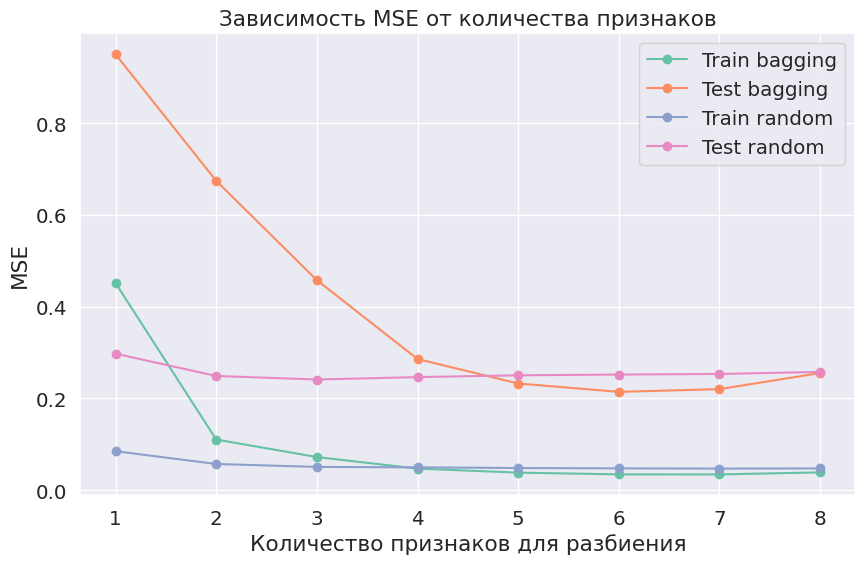

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_features + 1), mse_train_bagging, label='Train bagging', marker='o')
plt.plot(range(1, n_features + 1), mse_test_bagging, label='Test bagging', marker='o')
plt.plot(range(1, n_features + 1), mse_train, label='Train random', marker='o')
plt.plot(range(1, n_features + 1), mse_test, label='Test random', marker='o')
plt.xlabel('Количество признаков для разбиения')
plt.ylabel('MSE')
plt.title('Зависимость MSE от количества признаков')
plt.legend()
plt.grid(True)
plt.show()

Сравните результаты обычного случайного леса с только что построенным лесом.

Сделайте выводы. Объясните, чем плох такой подход пострения случайного леса. Какое преимущество мы получаем, когда выбираем случайное подмножество признаков в каждой вершине в обычном случайном лесу? Опирайтесь в своих рассуждениях на bias-variance разложение.

**Вывод.**

Ошибка на обучающей выборке меньше для bagging модели, но больше для random модели. При этом на тестовой выборке ровно наоборот, bagging становится не хуже только если признаков будет достаточно много.

Это работает так:
1) bagging переобучается на тренировочной выборке за счет уменьшения случайности
2) Случайный лес лучше на тестовой выборке за счет более разнообразных деревьев (меньше скоррелированы, а в bagging - bias'ы суммируются) - они меньше делают скоррелированых ошибок, которые увеличивают суммированную ошибку

Итого случайный лес снижает variance за счет увеличения разнообразия деревьев, что и является его основным преимуществом перед методами с фиксированным набором признаков.

Поясните разницу между следующими конструкциями:

`BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_features=n_features)`

`BaggingRegressor(base_estimator=DecisionTreeRegressor(max_features=n_features))`

В первом случае для каждого дерева выбирается случайное подмножество признаков, но это подмножество фиксируется на уровне дерева, а не вершины. 

Во втором случае такой выбор происходит уже в каждом узле

---
### Задача 3

На лекции получена формула bias-variance разложения для беггинга. Проведите эксперимент, в котором выясните, насколько уменьшается разброс (variance-компонента) беггинг-модели на 100 базовых моделях по отношению к одной базовой модели. Используйте данные из предыдущей задачи. Рассмотрите беггинг на следующих базовых моделях:
* решающие деревья, можно использовать вариант случайного леса,
* ридж-регрессия.

Для решения задачи потребуется оценить корреляции предсказаний на тестовой выборке базовых моделей, входящих в состав беггинг-модели. Их можно получить с помощью поля `estimators_` у обученной беггинг-модели. Для оценки корреляций используйте [`scipy.stats.pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) или [`numpy.corrcoef`](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html).

Насколько уменьшается разброс в каждом случае? Для каждого случая постройте также матрицу корреляций предсказаний базовых моделей и гистограмму по ним.

Обучение моделей

In [24]:
bagging_dt = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=max_depth),
                              n_estimators=100, random_state=42)
bagging_dt.fit(X_train, y_train)

bagging_ridge = BaggingRegressor(estimator=Ridge(alpha=1.0),
                                 n_estimators=100, random_state=42)
bagging_ridge.fit(X_train, y_train)

BaggingRegressor(estimator=Ridge(), n_estimators=100, random_state=42)

Предсказания (в качестве базовой берем первую из беггинга)

In [25]:
predictions_bagging_dt = bagging_dt.predict(X_test)
base_predictions_dt = np.array([estimator.predict(X_test) for estimator in bagging_dt.estimators_]).T
base_model_dt_predictions = bagging_dt.estimators_[0].predict(X_test)  # Нулевая модель

predictions_bagging_ridge = bagging_ridge.predict(X_test)
base_predictions_ridge = np.array([estimator.predict(X_test) for estimator in bagging_ridge.estimators_]).T
base_model_ridge_predictions = bagging_ridge.estimators_[0].predict(X_test)  # Нулевая модель

Осталось посчитать variance и корреляции

In [26]:
var_dt = np.var(base_model_dt_predictions)
var_bagging_dt = np.var(predictions_bagging_dt)

var_ridge = np.var(base_model_ridge_predictions)
var_bagging_ridge = np.var(predictions_bagging_ridge)

corr_dt = np.corrcoef(base_predictions_dt.T)
corr_ridge = np.corrcoef(base_predictions_ridge.T)

# Надо убрать единички с диагонали - просто берем верхнюю часть матрицы 
# для гистограммы
upper_corr_dt = corr_dt[np.triu_indices_from(corr_dt, k=1)]
upper_corr_ridge = corr_ridge[np.triu_indices_from(corr_ridge, k=1)]

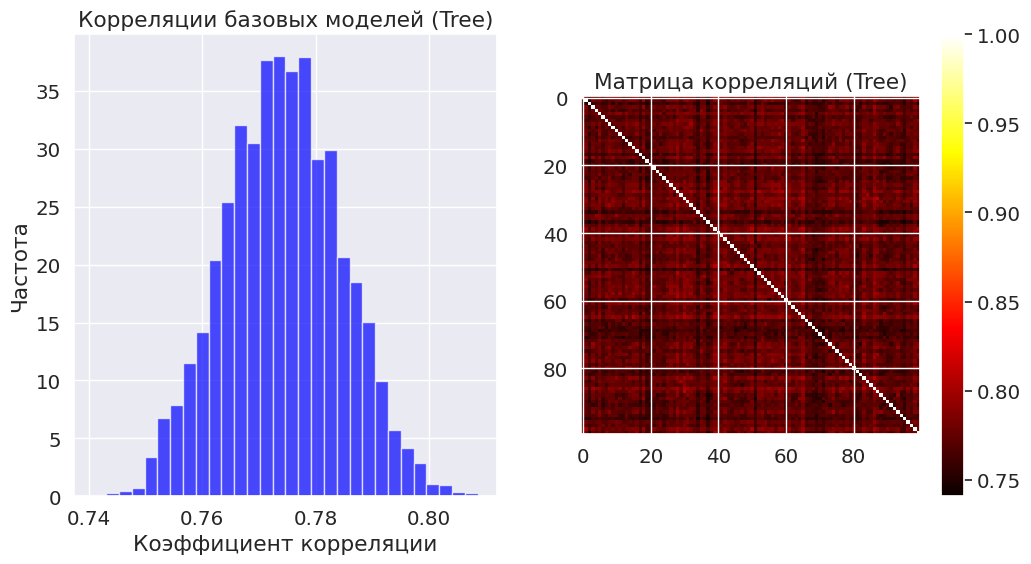

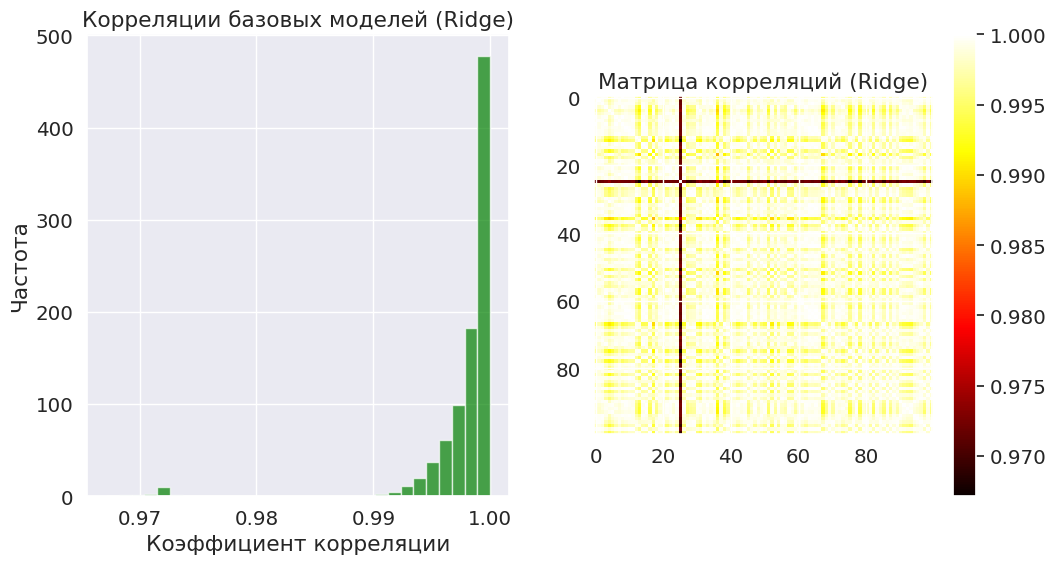

In [27]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(upper_corr_dt, bins=30, alpha=0.7, color='blue', density=True)
plt.title('Корреляции базовых моделей (Tree)')
plt.xlabel('Коэффициент корреляции')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.imshow(corr_dt, cmap='hot', interpolation='nearest')
plt.title('Матрица корреляций (Tree)')
plt.colorbar()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(upper_corr_ridge, bins=30, alpha=0.7, color='green', density=True)
plt.title('Корреляции базовых моделей (Ridge)')
plt.xlabel('Коэффициент корреляции')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.imshow(corr_ridge, cmap='hot', interpolation='nearest')
plt.title('Матрица корреляций (Ridge)')
plt.colorbar()
plt.show()

In [28]:
print('-' * 40)
print(f'Разброс базовой модели DecisionTree: {var_dt:.4f}')
print(f'Разброс бэггинг-модели DecisionTree: {var_bagging_dt:.4f}')
print(f'Уменьшение разброса (деревья): {var_dt - var_bagging_dt:.4f}')
print('-' * 40)
print(f'Разброс базовой модели Ridge: {var_ridge:.4f}')
print(f'Разброс бэггинг-модели Ridge: {var_bagging_ridge:.4f}')
print(f'Уменьшение разброса (Ridge): {var_ridge - var_bagging_ridge:.4f}')
print('-' * 40)

----------------------------------------
Разброс базовой модели DecisionTree: 1.3026
Разброс бэггинг-модели DecisionTree: 1.0260
Уменьшение разброса (деревья): 0.2766
----------------------------------------
Разброс базовой модели Ridge: 0.7549
Разброс бэггинг-модели Ridge: 0.7671
Уменьшение разброса (Ridge): -0.0122
----------------------------------------


**Вывод:**

Как видно, разброс уменьшился для деревьев, но для Ridge - нет. Это логичный результат - Ridge работает довольно детерминированно, в нем случайности нет, тогда как в деревьях ее много. Это соотносится и с тем, что результаты первой сильно скоррелированы между собой, а второй - не так сильно

В среднем, корреляция деревьев 0.7 - 0.75

---
### Задача 4

В этой задаче вам предлагается расмотреть и сравнить две стратегии поиска оптимальных значений некоторого функционала: **Grid Search** и **Random Search**. В реальной жизни значение функционала &mdash; это значение целевой метрики качества, а оптимизация идет по гиперпараметрам некоторой модели машинного обучения. Коротко напомним, в чем же заключается каждая стратегия.

* **Grid Search** &mdash; полный перебор по сетке. Суть перебора по сетке заключается в следующем: вы задаете область значений гиперпараметров, которые хотите оптимизировать, обучаете все модели, которые возможно получить в рамках заданного пространства поиска гиперпараметров. Затем выбираете из данных моделей ту, которая дала наилучшее качество на кросс-валидации.
* **Random Search** &mdash; это стратегия, при которой рассматривается некоторая выборка из множества значений гиперпараметров. По умолчанию часто используется равномерное распределение. Лучшая модель выбирается так же на основе кросс-валидации.

Разберем сначала **одномерный случай**. Для этого рассмотрим следующую функцию.

In [29]:
def f(x):
    return 5.2 - 5/(1+(3*(x))**2) - np.cos(x)/5

Поcтройте график функции $f(x)$ на отрезке $[-20, 20]$. В чем его особенность?

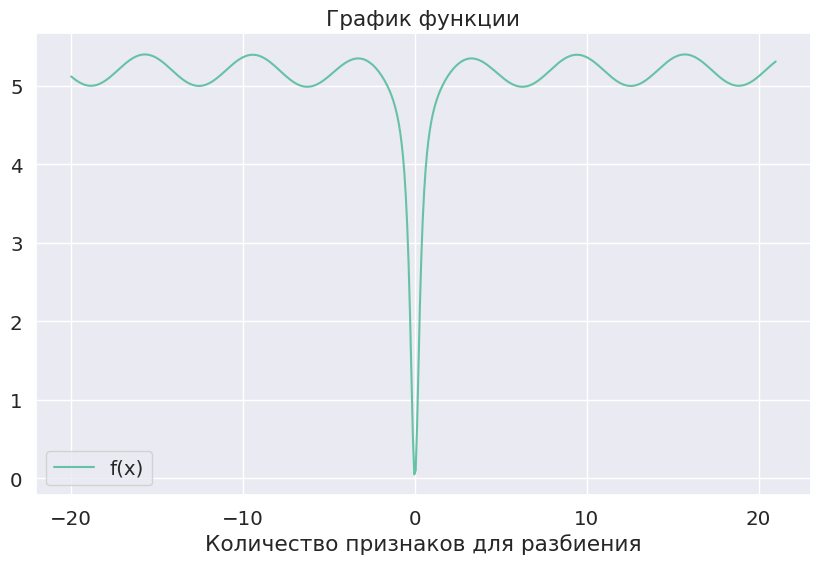

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(-20, 21, 500), f(np.linspace(-20, 21, 500)), label='f(x)')
plt.xlabel('Количество признаков для разбиения')
plt.title('График функции')
plt.legend()
plt.grid(True)
plt.show()

Подумайте, какие проблемы могут возникнуть при поиске минимума этой функции, если используется поиск по сетке?

**Ответ:**  

Особенность графика - пиковый абсолютный минимум в нуле

Сетка может не попасть в район нуля, особенно если шаг слишком большой, она не найдет этот минимум

Рассмотрим **поиск по сетке** и проведем вычислительный эксперимент. Для этого будем генерировать случайное смещение из $U[-0.5, 0.5]$, а затем рассматривать смещенную на $x_0$ сетку размера $n$ на отрезке $[-10, 10]$, после чего поиском по сетке искать оптимальное значение $f$.

In [31]:
# рассматриваемые размеры сеток
grid_size = np.arange(2, 1000)
n_experiments = 100  # количество экспериментов

In [32]:
from tqdm import tqdm
# массив для минимумов по сетке для текущего эксперимента
grid_min_f_trace = []

for _ in tqdm(range(n_experiments)):
    # случайное смещение сетки на [-0.5, 0.5]
    x_0 = np.random.uniform(-0.5, 0.5)
    # массив для минимумов для текущего размера сетки
    grid_f_min = []
    # цикл по размеру сетки
    for n in grid_size:
        # сетка на [-10, 10] размера n
        grid = np.linspace(-10, 10, n) + x_0
        # найденный по сетке со смещением x_0 минимум функции f
        f_min = np.min(f(grid))
        # сохраним минимум для сетки размера n
        grid_f_min.append(f_min)
    # сохраним минимумы текущего эксперимента
    grid_min_f_trace.append(grid_f_min)

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:07<00:00, 13.41it/s]


Для нескольких экспериментов постройте графики значений минимума от количества точек в сетке. 
Для большей наглядности и информативности сразу **зафиксируйте диапазон значений по оси y**, а также отображайте графики в **логарифмическом масштабе**.

/tmp/ipykernel_47313/1136293358.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


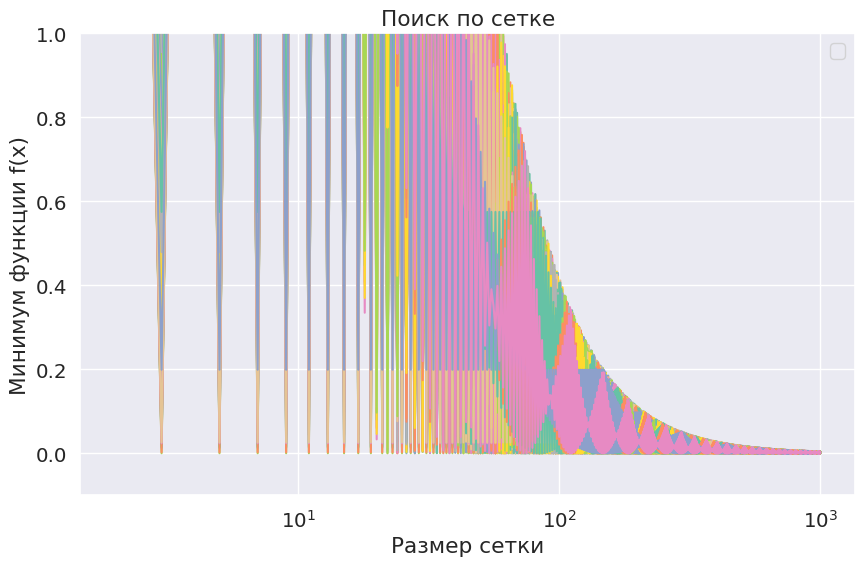

In [33]:
plt.figure(figsize=(10, 6))

for i in range(n_experiments):
    plt.plot(grid_size, grid_min_f_trace[i])

plt.xscale('log')
plt.ylim(-0.1, 1)

plt.xlabel('Размер сетки')
plt.ylabel('Минимум функции f(x)')
plt.title('Поиск по сетке')
plt.legend()
plt.grid(True)
plt.show()

Теперь рассмотрим **случайный поиск**. Снова проведем вычислительный эксперимент. Обратите внимание, что случайные точки для эксперимента мы генерируем один раз.

In [34]:
# рассматриваемое количество случайных точек
random_size = np.arange(2, 1000)

In [35]:
# массив для минимумов для текущего эксперимента
random_min_f_trace = []

# цикл по экспериментам
for _ in tqdm(range(n_experiments)):
    # случайное смещение на [-0.5, 0.5]
    x_0 = np.random.uniform(-0.5, 0.5)
    # массив для минимумов для текущего количества точек
    random_min_f = []
    # сгенерируем случайные на [-10, 10] точки сразу
    points = np.random.uniform(-10, 10, 1000) 
    
    #цикл по количеству точек
    for n in random_size:
        # найденный по первым n случайным точкам со смещением x_0 минимум функции f
        f_min = np.min(f(points[:n] + x_0))
        # сохранение результатов
        random_min_f.append(f_min)
        
    random_min_f_trace.append(random_min_f)

100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 24.66it/s]


Снова для нескольких экспериментов постройте графики значений минимума от количества точек при случайном поиске.

/tmp/ipykernel_47313/1482878699.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


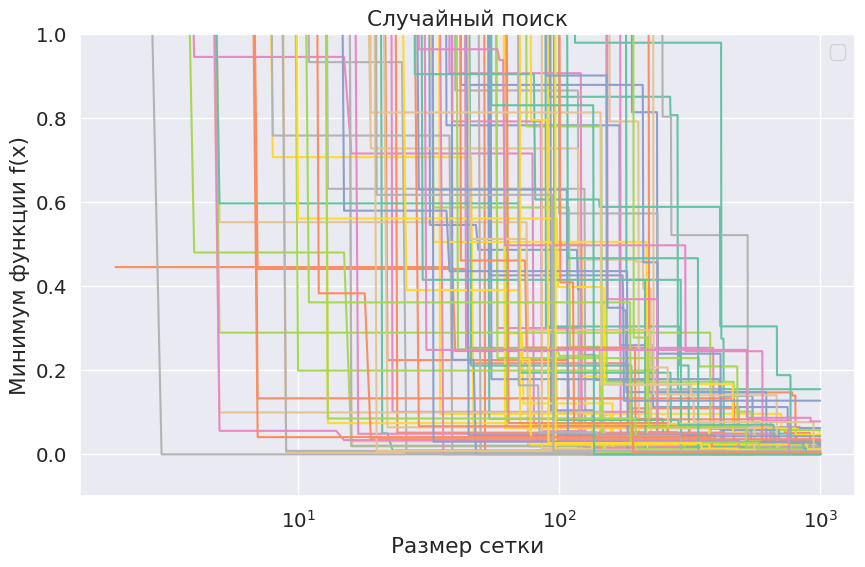

In [36]:
plt.figure(figsize=(10, 6))

for i in range(n_experiments):
    plt.plot(grid_size, random_min_f_trace[i])

plt.xscale('log')
plt.ylim(-0.1, 1)

plt.xlabel('Размер сетки')
plt.ylabel('Минимум функции f(x)')
plt.title('Случайный поиск')
plt.legend()
plt.grid(True)
plt.show()

Сравним два метода. Для этого постройте график зависимости найденного минимума от количества точек (случайных или в сетке). Перед этим предварительно усредните результат по количеству экспериментов. Какие результаты у вас получились?

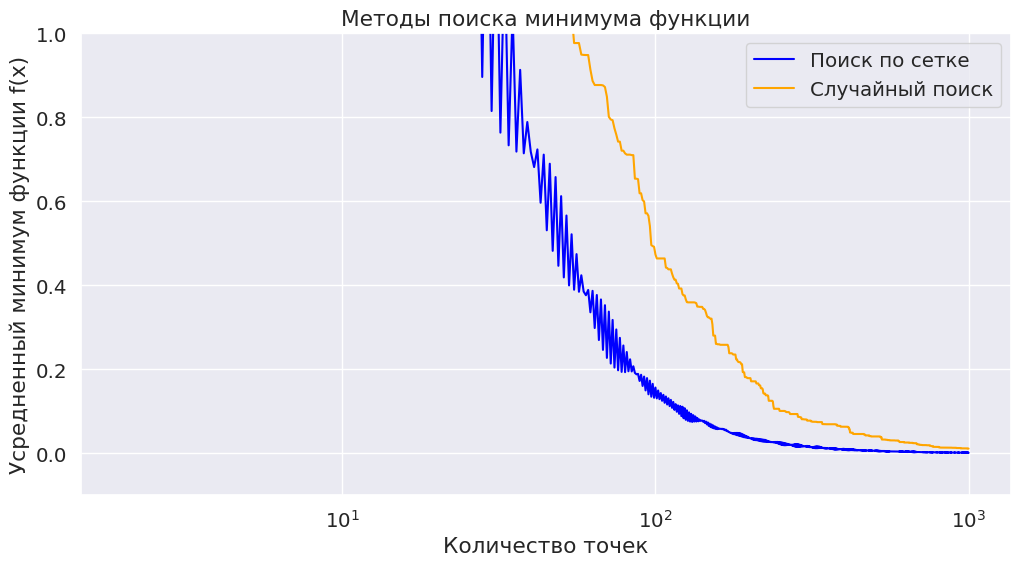

In [37]:
average_grid_min_f = np.mean(grid_min_f_trace, axis=0)
average_random_min_f = np.mean(random_min_f_trace, axis=0)

plt.figure(figsize=(12, 6))
plt.plot(grid_size, average_grid_min_f, label='Поиск по сетке', color='blue')
plt.plot(random_size, average_random_min_f, label='Случайный поиск', color='orange')

plt.xscale('log')
plt.ylim(-0.1, 1)

plt.xlabel('Количество точек')
plt.ylabel('Усредненный минимум функции f(x)')
plt.title('Методы поиска минимума функции')
plt.legend()
plt.grid(True)
plt.show()

Теперь расмотрим **двумерный случай**, для этого определим следующую функцию:

In [38]:
def f(x, y,):
    return 5.4 - 5/(1+(3*x)**2) - np.cos(x)/5 - np.cos(y)/5

Постройте тепловую карту значений этой функции на $[-20, 20]^2$.

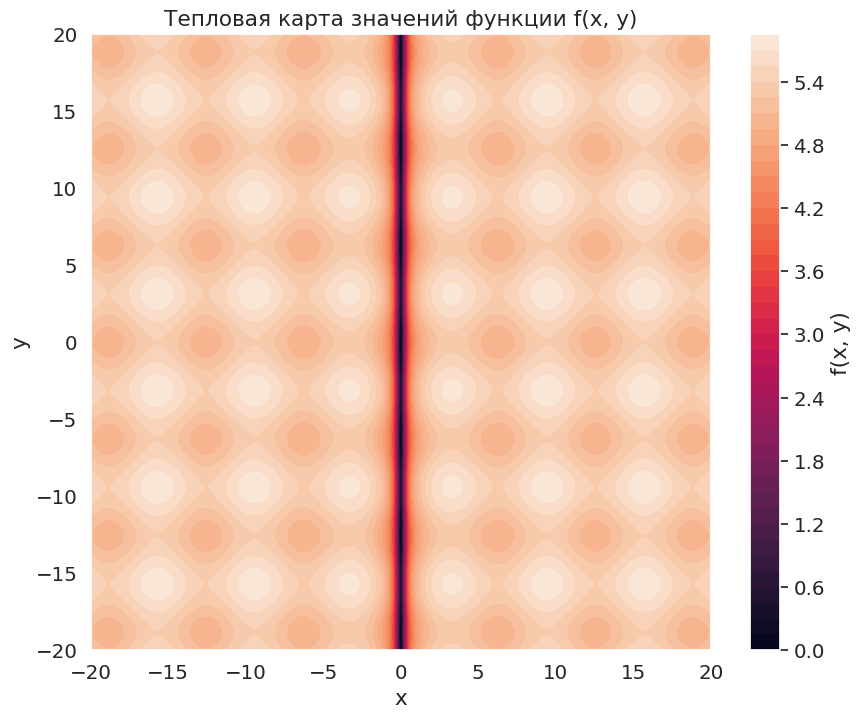

In [39]:
x = np.linspace(-20, 20, 400)
y = np.linspace(-20, 20, 400)
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(10, 8))
plt.contourf(X, Y, f(X, Y), levels=50)
plt.colorbar(label='f(x, y)')
plt.title('Тепловая карта значений функции f(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Проведите эксперимент, аналогичный одномерному случаю. В случае поиска по сетке рассмотрите сетку размера $n$ на $[-10, 10]$ по каждой координате. Таким образом, общий размер сетки будет $n^2$. Для ускорения вычислений в случае случайного поиска будет достаточно рассмотреть только такое количество точек, которое соответствует рассмотренным размерам сетки (т.е. квадраты чисел).

Сравните результат с полученным ранее. Сделайте вывод.

In [40]:
grid_size = np.arange(2, 100)
n_experiments = 100

grid_min_f_trace_2d = []

# Поиск по сетке
for _ in tqdm(range(n_experiments)):
    x_0 = np.random.uniform(-0.5, 0.5, size=2)
    grid_f_min = []
    for n in grid_size:
        x_grid = np.linspace(-10, 10, n) + x_0[0]
        y_grid = np.linspace(-10, 10, n) + x_0[1]
        
        X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
        f_min = np.min(f(X_grid, Y_grid))
        grid_f_min.append(f_min)
    grid_min_f_trace_2d.append(grid_f_min)

random_min_f_trace_2d = []
for _ in tqdm(range(n_experiments)):
    x_0 = np.random.uniform(-0.5, 0.5, size=2)
    random_min_f = []
    points_x = np.random.uniform(-10, 10, 10000)
    points_y = np.random.uniform(-10, 10, 10000)
    for n in grid_size:
        f_min = np.min(f(points_x[:n**2] + x_0[0], points_y[:n**2] + x_0[1]))
        random_min_f.append(f_min)
    random_min_f_trace_2d.append(random_min_f)


100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 47.27it/s]


И графики

/tmp/ipykernel_47313/2433316926.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


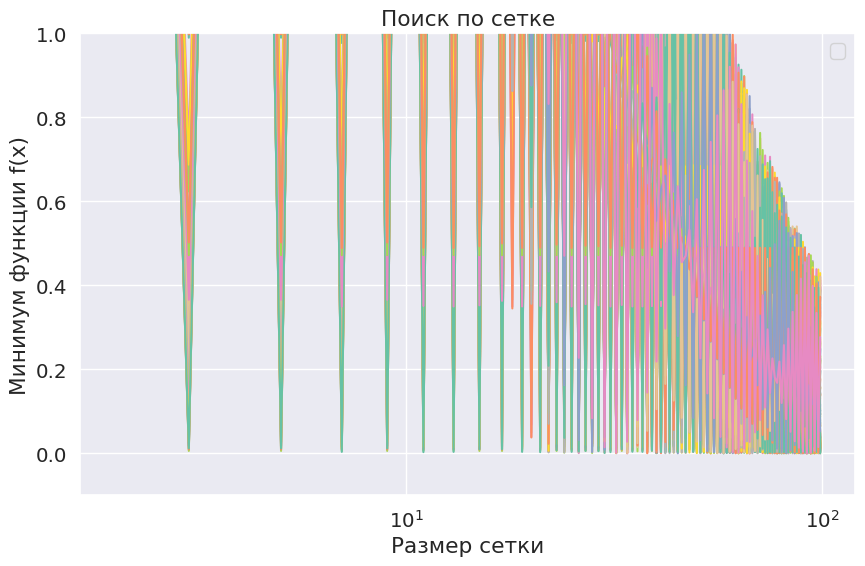

In [41]:
plt.figure(figsize=(10, 6))

for i in range(n_experiments):
    plt.plot(grid_size, grid_min_f_trace_2d[i])

plt.xscale('log')
plt.ylim(-0.1, 1)

plt.xlabel('Размер сетки')
plt.ylabel('Минимум функции f(x)')
plt.title('Поиск по сетке')
plt.legend()
plt.grid(True)
plt.show()

Для случайного поиска

/tmp/ipykernel_47313/2642397647.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


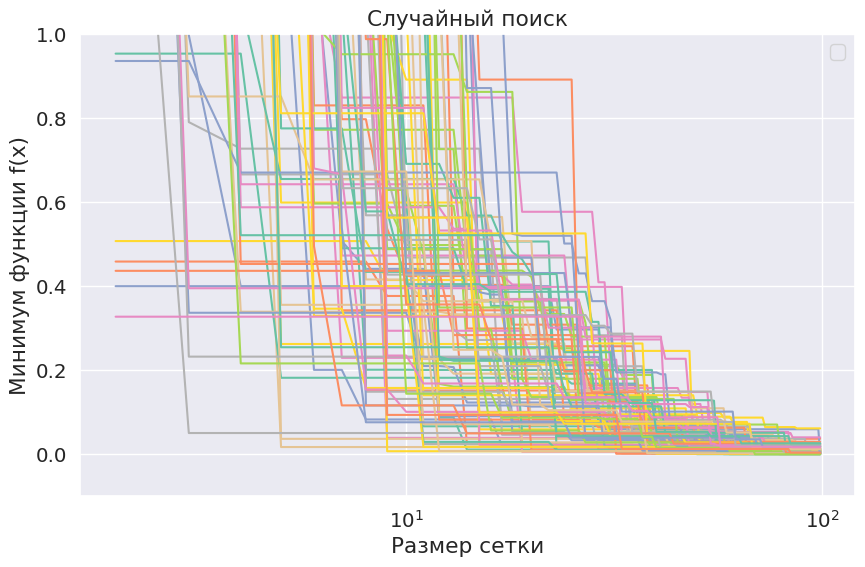

In [42]:
plt.figure(figsize=(10, 6))

for i in range(n_experiments):
    plt.plot(grid_size, random_min_f_trace_2d[i])

plt.xscale('log')
plt.ylim(-0.1, 1)

plt.xlabel('Размер сетки')
plt.ylabel('Минимум функции f(x)')
plt.title('Случайный поиск')
plt.legend()
plt.grid(True)
plt.show()

И усреднение минимумов

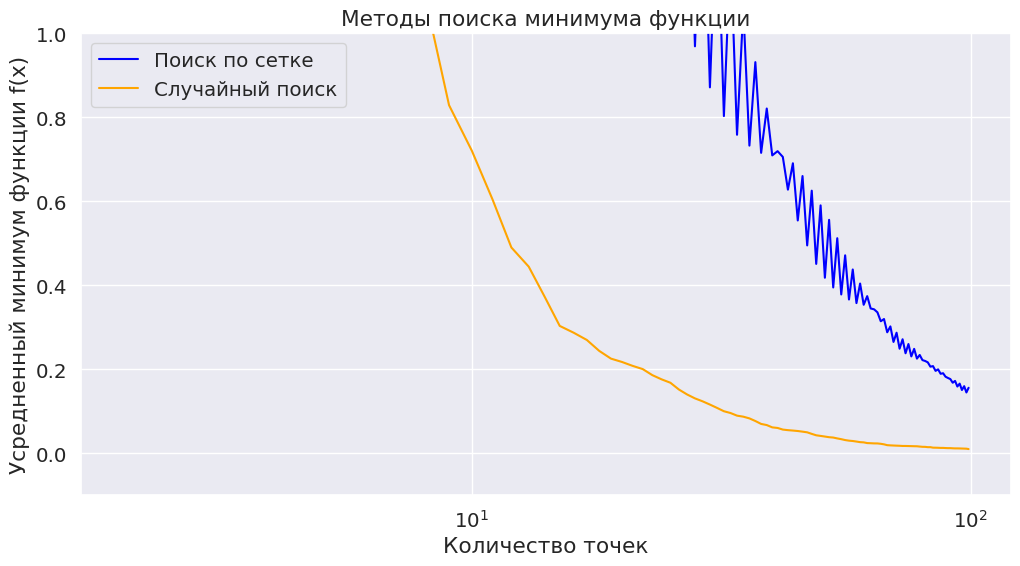

In [43]:
average_grid_min_f_2d = np.mean(grid_min_f_trace_2d, axis=0)
average_random_min_f_2d = np.mean(random_min_f_trace_2d, axis=0)

plt.figure(figsize=(12, 6))
plt.plot(grid_size, average_grid_min_f_2d, label='Поиск по сетке', color='blue')
plt.plot(grid_size, average_random_min_f_2d, label='Случайный поиск', color='orange')

plt.xscale('log')
plt.ylim(-0.1, 1)

plt.xlabel('Количество точек')
plt.ylabel('Усредненный минимум функции f(x)')
plt.title('Методы поиска минимума функции')
plt.legend()
plt.grid(True)
plt.show()

**Вывод:**

Ситуация повторяется, как и с методом Монте-Карло в матстатах. Проклятие размерностей. Сетке еще сложнее попасть в минимальное значение функции с увеличением размерности пространства, а большая часть точек становятся бесполезными. 

Уже на двумерной плоскости случайный случайный поиск выигрывает поиск по сетке.
